In [1]:
!pip install imutils

# **Getting the files and filepaths**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
cd /content/drive/My\ Drive/Research/COVID/data

/content/drive/My Drive/Research/COVID/data


In [0]:
EPOCHS = 100
IMSIZE = 224
LR = 1e-3
TRAINBS = 12
TESTBS = 10
BS = 70
EXACC = 0.95
EXLOSS = 0.0001

In [0]:
d1_base_dir = "/content/drive/My Drive/Research/COVID/data/COVIDvsARDS/"
d2_base_dir = "/content/drive/My Drive/Research/COVID/data/COVIDvsNORMAL/"
d3_base_dir = "/content/drive/My Drive/Research/COVID/data/COVIDvsVBPNEUMONIA/"

d1_train_dir = "/content/drive/My Drive/Research/COVID/data/COVIDvsARDS/train/"
d2_train_dir = "/content/drive/My Drive/Research/COVID/data/COVIDvsNORMAL/train/"
d3_train_dir = "/content/drive/My Drive/Research/COVID/data/COVIDvsVBPNEUMONIA/train/"

d1_test_dir = "/content/drive/My Drive/Research/COVID/data/COVIDvsARDS/test/"
d2_test_dir = "/content/drive/My Drive/Research/COVID/data/COVIDvsNORMAL/test/"
d3_test_dir = "/content/drive/My Drive/Research/COVID/data/COVIDvsVBPNEUMONIA/test/"

d1_validation_dir = "/content/drive/My Drive/Research/COVID/data/COVIDvsARDS/validation/"
d2_validation_dir = "/content/drive/My Drive/Research/COVID/data/COVIDvsNORMAL/validation/"
d3_validation_dir = "/content/drive/My Drive/Research/COVID/data/COVIDvsVBPNEUMONIA/validation/"

d1_main_dir = "/content/drive/My Drive/Research/COVID/data/COVIDvsARDS/main/"
d2_main_dir = "/content/drive/My Drive/Research/COVID/data/COVIDvsNORMAL/main/"
d3_main_dir = "/content/drive/My Drive/Research/COVID/data/COVIDvsVBPNEUMONIA/main/"

In [0]:
import imutils
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255,
                                                                rotation_range=20,
                                                                fill_mode="nearest")

"""validation_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)"""

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)

**Working on D1 DATASET - COVID vs ARDS**

In [8]:
#getting the generators

d1_train_generator = train_datagen.flow_from_directory(d1_train_dir, 
                                                       target_size=(IMSIZE,IMSIZE), 
                                                       class_mode='binary', 
                                                       batch_size=TRAINBS, 
                                                       shuffle=True)

"""d1_validation_generator = validation_datagen.flow_from_directory(d1_validation_dir, 
                                                                 target_size=(256,256), 
                                                                 class_mode='binary', 
                                                                 batch_size=8, 
                                                                 shuffle=False)"""

d1_test_generator = test_datagen.flow_from_directory(d1_test_dir, 
                                                     target_size=(IMSIZE,IMSIZE),
                                                     class_mode="binary", 
                                                     batch_size=TESTBS, 
                                                     shuffle=False)

d1_stepsize_train = d1_train_generator.n//d1_train_generator.batch_size
"""d1_stepsize_validation = d1_validation_generator.n//d1_validation_generator.batch_size"""
d1_stepsize_test = d1_test_generator.n//d1_test_generator.batch_size

print(d1_stepsize_train)
print(d1_stepsize_test)
"""print(d1_stepsize_validation)"""

Found 86 images belonging to 2 classes.
Found 70 images belonging to 2 classes.
7
7


'print(d1_stepsize_validation)'

In [9]:
#getting the generators

d2_train_generator = train_datagen.flow_from_directory(d2_train_dir, 
                                                       target_size=(IMSIZE,IMSIZE),
                                                       class_mode='binary', 
                                                       batch_size=TRAINBS, 
                                                       shuffle=True)

"""d2_validation_generator = validation_datagen.flow_from_directory(d2_validation_dir, 
                                                                 target_size=(256,256), 
                                                                 class_mode='binary', 
                                                                 batch_size=8, 
                                                                 shuffle=False)"""

d2_test_generator = test_datagen.flow_from_directory(d2_test_dir, 
                                                     target_size=(IMSIZE,IMSIZE),
                                                     class_mode='binary', 
                                                     batch_size=TESTBS, 
                                                     shuffle=False)

d2_stepsize_train = d2_train_generator.n//d2_train_generator.batch_size
"""d2_stepsize_validation = d2_validation_generator.n//d2_validation_generator.batch_size"""
d2_stepsize_test = d2_test_generator.n//d2_test_generator.batch_size

print(d2_stepsize_train)
print(d2_stepsize_test)
"""print(d2_stepsize_validation)"""

Found 86 images belonging to 2 classes.
Found 70 images belonging to 2 classes.
7
7


'print(d2_stepsize_validation)'

In [10]:
#getting the generators

d3_train_generator = train_datagen.flow_from_directory(d3_train_dir, 
                                                       target_size=(IMSIZE,IMSIZE), 
                                                       class_mode='binary', 
                                                       batch_size=TRAINBS, 
                                                       shuffle=True)

"""d3_validation_generator = validation_datagen.flow_from_directory(d3_validation_dir, 
                                                                 target_size=(256,256), 
                                                                 class_mode='binary', 
                                                                 batch_size=8, 
                                                                 shuffle=False)"""

d3_test_generator = test_datagen.flow_from_directory(d3_test_dir, 
                                                     target_size=(IMSIZE,IMSIZE), 
                                                     batch_size=TESTBS, 
                                                     class_mode='binary',
                                                     shuffle=False)

d3_stepsize_train = d3_train_generator.n//d3_train_generator.batch_size
"""d3_stepsize_validation = d3_validation_generator.n//d3_validation_generator.batch_size"""
d3_stepsize_test = d3_test_generator.n//d3_test_generator.batch_size

print(d3_stepsize_train)
"""print(d3_stepsize_validation)"""
print(d3_stepsize_test)

Found 86 images belonging to 2 classes.
Found 70 images belonging to 2 classes.
7
7


In [11]:
d3_train_generator.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int32)

In [0]:
#validation_generator.classes

In [0]:
#ls -a /content/drive/My\ Drive/Research/COVID/data/COVIDvsNORMAL/train/

In [0]:
#rmdir /content/drive/My\ Drive/Research/COVID/data/COVIDvsVBPNEUMONIA/test/.ipynb_checkpoints/

# **VGG16**

In [15]:
base_model = tf.keras.applications.VGG16(include_top = False, weights='imagenet', input_shape=(IMSIZE,IMSIZE,3))
#base_model.summary()

x = base_model.output
x = tf.keras.layers.Conv2D(16, (3,3), activation='relu')(x)
x = tf.keras.layers.MaxPooling2D(2,2)(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(32, activation="relu")(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(1, activation="sigmoid")(x)

for layer in base_model.layers:
  layer.trainable = False

vgg16_model = tf.keras.Model(base_model.input, x)
vgg16_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=LR), loss='binary_crossentropy', metrics=['accuracy'])

#vgg16_model.summary()

58892288/58889256 [==============================] - 1s 0us/step


In [0]:
class myCallBack(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('loss') <= EXLOSS):
      print("\nCALLBAKC: TRAINING LOSS {} reached.".format(EXLOSS))
      self.model.stop_training  = True

ccall = myCallBack()

es = tf.keras.callbacks.EarlyStopping(monitor='loss', mode='min', baseline = 0.01, patience=10, restore_best_weights=True)

In [20]:
d1_vgg16_history = vgg16_model.fit(d1_train_generator, 
                          epochs=EPOCHS, 
                          validation_data=d1_test_generator, 
                          steps_per_epoch=d1_stepsize_train, 
                          validation_steps=d1_stepsize_test,
                          callbacks=[ccall, es]
                          )

Epoch 1/100
7/7 [==============================] - 7s 937ms/step - loss: 0.0055 - accuracy: 1.0000 - val_loss: 1.6185 - val_accuracy: 0.7143
Epoch 2/100
7/7 [==============================] - 7s 944ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 1.5775 - val_accuracy: 0.7000
Epoch 3/100
7/7 [==============================] - 7s 939ms/step - loss: 0.0071 - accuracy: 1.0000 - val_loss: 1.6196 - val_accuracy: 0.7143
Epoch 4/100
7/7 [==============================] - 7s 1s/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 1.5849 - val_accuracy: 0.7143
Epoch 5/100
7/7 [==============================] - 7s 1s/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 1.6029 - val_accuracy: 0.7143
Epoch 6/100
7/7 [==============================] - 7s 932ms/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 1.6742 - val_accuracy: 0.7286
Epoch 7/100
7/7 [==============================] - 8s 1s/step - loss: 0.0058 - accuracy: 1.0000 - val_loss: 1.6420 - val_accuracy: 0.7286
Epoch 8/100
7/7 [=====

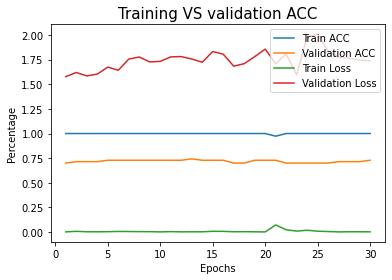

In [42]:
acc = d1_vgg16_history.history['accuracy']
loss = d1_vgg16_history.history['loss']

val_acc = d1_vgg16_history.history['val_accuracy']
val_loss = d1_vgg16_history.history['val_loss']

epochs = len(acc)

plt.plot(range(1, epochs), acc[1:], label='Train ACC')
plt.plot(range(1, epochs), val_acc[1:], label='Validation ACC')
plt.plot(range(1, epochs), loss[1:], label='Train Loss')
plt.plot(range(1, epochs), val_loss[1:], label='Validation Loss')
plt.title('Training VS validation ACC', size=15)
plt.xlabel("Epochs")
plt.ylabel("Percentage")
plt.legend()
plt.savefig("vgg16_d1.png")
plt.show()

In [0]:
d1_pred = vgg16_model.predict(d1_test_generator, steps=d1_stepsize_test)

In [23]:
d1_pred

array([[9.9998856e-01],
       [9.9999988e-01],
       [9.9999559e-01],
       [3.7981950e-02],
       [5.2098376e-01],
       [9.9920684e-01],
       [7.8502166e-01],
       [5.9762055e-01],
       [9.9999642e-01],
       [9.8635834e-01],
       [9.9994826e-01],
       [1.3061168e-02],
       [9.9958569e-01],
       [9.9522781e-01],
       [9.9982017e-01],
       [2.3310551e-02],
       [9.9951148e-01],
       [9.9976748e-01],
       [9.9999166e-01],
       [9.9911278e-01],
       [9.9936610e-01],
       [9.9969268e-01],
       [9.9104261e-01],
       [9.9999976e-01],
       [9.4535995e-01],
       [9.9986768e-01],
       [9.9697471e-01],
       [9.4575560e-01],
       [9.9408841e-01],
       [9.9987864e-01],
       [3.6736238e-01],
       [4.0271472e-02],
       [6.3783950e-03],
       [9.9870849e-01],
       [5.9262264e-01],
       [9.4549686e-01],
       [8.7397762e-02],
       [9.4008595e-01],
       [7.0789613e-02],
       [1.4526969e-02],
       [9.9999464e-01],
       [1.822974

In [24]:
d1_test_generator.classes.shape

(70,)

In [25]:
vgg16_model.evaluate(d1_test_generator, steps=d1_stepsize_test)

7/7 [==============================] - 3s 386ms/step - loss: 1.8569 - accuracy: 0.7286


[1.8568743467330933, 0.7285714149475098]

In [26]:
d2_vgg16_history = vgg16_model.fit(d2_train_generator, 
                          epochs=EPOCHS, 
                          validation_data=d2_test_generator, 
                          steps_per_epoch=d2_stepsize_train, 
                          validation_steps=d2_stepsize_test,
                          callbacks=[es, ccall]
                          )

Epoch 1/100
7/7 [==============================] - 46s 7s/step - loss: 0.0707 - accuracy: 0.9762 - val_loss: 0.4346 - val_accuracy: 0.8714
Epoch 2/100
7/7 [==============================] - 5s 747ms/step - loss: 0.0172 - accuracy: 1.0000 - val_loss: 0.2064 - val_accuracy: 0.9429
Epoch 3/100
7/7 [==============================] - 5s 728ms/step - loss: 0.0058 - accuracy: 1.0000 - val_loss: 0.2598 - val_accuracy: 0.9286
Epoch 4/100
7/7 [==============================] - 5s 683ms/step - loss: 0.0064 - accuracy: 1.0000 - val_loss: 0.0717 - val_accuracy: 0.9429
Epoch 5/100
7/7 [==============================] - 5s 722ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0354 - val_accuracy: 1.0000
Epoch 6/100
7/7 [==============================] - 5s 674ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0336 - val_accuracy: 0.9857
Epoch 7/100
7/7 [==============================] - 5s 702ms/step - loss: 0.0040 - accuracy: 1.0000 - val_loss: 0.0655 - val_accuracy: 0.9429
Epoch 8/100
7/7

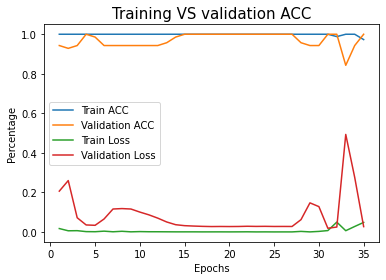

In [43]:
acc = d2_vgg16_history.history['accuracy']
loss = d2_vgg16_history.history['loss']

val_acc = d2_vgg16_history.history['val_accuracy']
val_loss = d2_vgg16_history.history['val_loss']

epochs = len(acc)

plt.plot(range(1, epochs), acc[1:], label='Train ACC')
plt.plot(range(1, epochs), val_acc[1:], label='Validation ACC')
plt.plot(range(1, epochs), loss[1:], label='Train Loss')
plt.plot(range(1, epochs), val_loss[1:], label='Validation Loss')
plt.title('Training VS validation ACC', size=15)
plt.xlabel("Epochs")
plt.ylabel("Percentage")
plt.legend()
plt.savefig("vgg16_d2.png")
plt.show()

In [0]:
d2_vgg16_pred = vgg16_model.predict(d2_test_generator, steps=d2_stepsize_test)

In [29]:
vgg16_model.evaluate(d2_test_generator, steps=d2_stepsize_test)

7/7 [==============================] - 2s 231ms/step - loss: 0.0277 - accuracy: 1.0000


[0.027691692113876343, 1.0]

In [30]:
d3_vgg16_history = vgg16_model.fit(d3_train_generator, 
                          epochs=EPOCHS, 
                          validation_data=d3_test_generator, 
                          steps_per_epoch=d3_stepsize_train, 
                          validation_steps=d3_stepsize_test,
                          callbacks=[es, ccall]
                          )

Epoch 1/100
7/7 [==============================] - 44s 6s/step - loss: 0.1671 - accuracy: 0.9286 - val_loss: 0.2415 - val_accuracy: 0.9000
Epoch 2/100
7/7 [==============================] - 4s 622ms/step - loss: 0.1847 - accuracy: 0.9054 - val_loss: 1.0795 - val_accuracy: 0.7000
Epoch 3/100
7/7 [==============================] - 4s 542ms/step - loss: 0.1707 - accuracy: 0.9189 - val_loss: 0.2410 - val_accuracy: 0.8857
Epoch 4/100
7/7 [==============================] - 4s 595ms/step - loss: 0.0982 - accuracy: 0.9595 - val_loss: 0.3212 - val_accuracy: 0.8714
Epoch 5/100
7/7 [==============================] - 4s 594ms/step - loss: 0.0846 - accuracy: 0.9730 - val_loss: 0.4739 - val_accuracy: 0.8429
Epoch 6/100
7/7 [==============================] - 4s 502ms/step - loss: 0.0117 - accuracy: 1.0000 - val_loss: 0.1097 - val_accuracy: 0.9286
Epoch 7/100
7/7 [==============================] - 4s 577ms/step - loss: 0.0124 - accuracy: 0.9865 - val_loss: 0.0731 - val_accuracy: 0.9714
Epoch 8/100
7/7

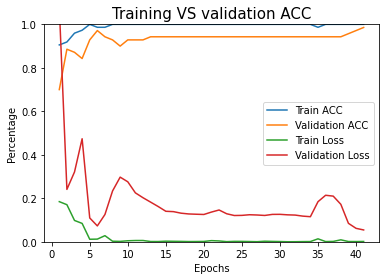

In [31]:
acc = d3_vgg16_history.history['accuracy']
loss = d3_vgg16_history.history['loss']

val_acc = d3_vgg16_history.history['val_accuracy']
val_loss = d3_vgg16_history.history['val_loss']

epochs = len(acc)

plt.plot(range(1, epochs), acc[1:], label='Train ACC')
plt.plot(range(1, epochs), val_acc[1:], label='Validation ACC')
plt.plot(range(1, epochs), loss[1:], label='Train Loss')
plt.plot(range(1, epochs), val_loss[1:], label='Validation Loss')
plt.title('Training VS validation ACC', size=15)
plt.xlabel("Epochs")
plt.ylabel("Percentage")
plt.legend()
plt.savefig("vgg16_d3.png")
plt.show()

In [0]:
d3_vgg16_pred = vgg16_model.predict(d3_test_generator, steps=d3_stepsize_test)

In [33]:
vgg16_model.evaluate(d3_test_generator, steps=d3_stepsize_test)

7/7 [==============================] - 1s 186ms/step - loss: 0.1240 - accuracy: 0.9429


[0.12404575198888779, 0.9428571462631226]

# **VGG19**

In [34]:
vgg19_basemodel = tf.keras.applications.VGG19(include_top = False, weights='imagenet', input_shape=(IMSIZE,IMSIZE,3))
#vgg19_basemodel.summary()

x = vgg19_basemodel.output

x = tf.keras.layers.Conv2D(16, (3,3), activation='relu')(x)
x = tf.keras.layers.MaxPooling2D(2,2)(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(32, activation="relu")(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(1, activation="sigmoid")(x)

for layer in vgg19_basemodel.layers:
  layer.trainable = False

vgg19_model = tf.keras.Model(vgg19_basemodel.input, x)
vgg19_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=LR), loss='binary_crossentropy', metrics=['accuracy'])

#vgg19_model.summary()

80142336/80134624 [==============================] - 1s 0us/step


In [35]:
esd1 = es = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', patience=10, restore_best_weights=True)

d1_vgg19_history = vgg19_model.fit(d1_train_generator, 
                          epochs=EPOCHS, 
                          validation_data=d1_test_generator, 
                          steps_per_epoch=d1_stepsize_train, 
                          validation_steps=d1_stepsize_test,
                          callbacks=[ccall, esd1]
                          )

Epoch 1/100
7/7 [==============================] - 7s 1s/step - loss: 0.7573 - accuracy: 0.5135 - val_loss: 0.6866 - val_accuracy: 0.5000
Epoch 2/100
7/7 [==============================] - 8s 1s/step - loss: 0.7910 - accuracy: 0.4865 - val_loss: 0.6845 - val_accuracy: 0.6143
Epoch 3/100
7/7 [==============================] - 7s 974ms/step - loss: 0.6723 - accuracy: 0.5541 - val_loss: 0.7128 - val_accuracy: 0.5000
Epoch 4/100
7/7 [==============================] - 6s 911ms/step - loss: 0.7222 - accuracy: 0.5541 - val_loss: 0.6670 - val_accuracy: 0.5714
Epoch 5/100
7/7 [==============================] - 7s 1s/step - loss: 0.6980 - accuracy: 0.5270 - val_loss: 0.6791 - val_accuracy: 0.6000
Epoch 6/100
7/7 [==============================] - 7s 1s/step - loss: 0.6314 - accuracy: 0.6548 - val_loss: 0.6629 - val_accuracy: 0.5429
Epoch 7/100
7/7 [==============================] - 7s 1s/step - loss: 0.6491 - accuracy: 0.5270 - val_loss: 0.6588 - val_accuracy: 0.5429
Epoch 8/100
7/7 [===========

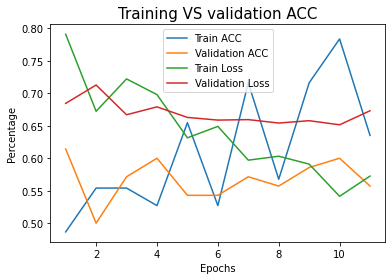

In [36]:
acc = d1_vgg19_history.history['accuracy']
loss = d1_vgg19_history.history['loss']

val_acc = d1_vgg19_history.history['val_accuracy']
val_loss = d1_vgg19_history.history['val_loss']

epochs = len(acc)

plt.plot(range(1, epochs), acc[1:], label='Train ACC')
plt.plot(range(1, epochs), val_acc[1:], label='Validation ACC')
plt.plot(range(1, epochs), loss[1:], label='Train Loss')
plt.plot(range(1, epochs), val_loss[1:], label='Validation Loss')
plt.title('Training VS validation ACC', size=15)
plt.xlabel("Epochs")
plt.ylabel("Percentage")
plt.legend()
plt.savefig("vgg19_d1.png")
plt.show()

In [37]:
d1_vgg19_pred = vgg19_model.predict(d1_test_generator, steps=d1_stepsize_test)
vgg19_model.evaluate(d1_test_generator, steps=d1_stepsize_test)

7/7 [==============================] - 3s 387ms/step - loss: 0.6845 - accuracy: 0.6143


[0.6844938397407532, 0.6142857074737549]

In [38]:
d2_vgg19_history = vgg19_model.fit(d2_train_generator, 
                          epochs=EPOCHS, 
                          validation_data=d2_test_generator, 
                          steps_per_epoch=d2_stepsize_train, 
                          validation_steps=d2_stepsize_test,
                          callbacks=[ccall, es]
                          )

Epoch 1/100
7/7 [==============================] - 5s 730ms/step - loss: 0.6584 - accuracy: 0.6622 - val_loss: 0.5682 - val_accuracy: 0.9857
Epoch 2/100
7/7 [==============================] - 5s 708ms/step - loss: 0.5418 - accuracy: 0.7432 - val_loss: 0.4631 - val_accuracy: 0.8143
Epoch 3/100
7/7 [==============================] - 5s 697ms/step - loss: 0.4130 - accuracy: 0.8378 - val_loss: 0.3276 - val_accuracy: 0.9714
Epoch 4/100
7/7 [==============================] - 5s 698ms/step - loss: 0.2972 - accuracy: 0.9595 - val_loss: 0.1829 - val_accuracy: 0.9857
Epoch 5/100
7/7 [==============================] - 5s 687ms/step - loss: 0.1512 - accuracy: 0.9865 - val_loss: 0.1107 - val_accuracy: 0.9857
Epoch 6/100
7/7 [==============================] - 5s 771ms/step - loss: 0.1189 - accuracy: 1.0000 - val_loss: 0.0647 - val_accuracy: 0.9857
Epoch 7/100
7/7 [==============================] - 5s 781ms/step - loss: 0.0973 - accuracy: 0.9865 - val_loss: 0.0565 - val_accuracy: 0.9857
Epoch 8/100
7

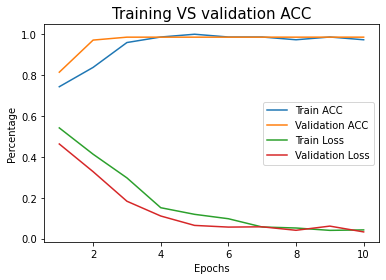

In [39]:
acc = d2_vgg19_history.history['accuracy']
loss = d2_vgg19_history.history['loss']

val_acc = d2_vgg19_history.history['val_accuracy']
val_loss = d2_vgg19_history.history['val_loss']

epochs = len(acc)

plt.plot(range(1, epochs), acc[1:], label='Train ACC')
plt.plot(range(1, epochs), val_acc[1:], label='Validation ACC')
plt.plot(range(1, epochs), loss[1:], label='Train Loss')
plt.plot(range(1, epochs), val_loss[1:], label='Validation Loss')
plt.title('Training VS validation ACC', size=15)
plt.xlabel("Epochs")
plt.ylabel("Percentage")
plt.legend()
plt.savefig("vgg19_d2.png")
plt.show()

In [40]:
d2_vgg19_pred = vgg19_model.predict(d2_test_generator, steps=d2_stepsize_test)
vgg19_model.evaluate(d2_test_generator, steps=d2_stepsize_test)

7/7 [==============================] - 2s 230ms/step - loss: 0.5682 - accuracy: 0.9857


[0.5681776404380798, 0.9857142567634583]

In [44]:
esd3 = tf.keras.callbacks.EarlyStopping(monitor='loss', mode='min', baseline = 0.01, patience=20, restore_best_weights=True)

d3_vgg19_history = vgg19_model.fit(d3_train_generator, 
                          epochs=EPOCHS,
                          validation_data=d3_test_generator, 
                          steps_per_epoch=d3_stepsize_train, 
                          validation_steps=d3_stepsize_test,
                          callbacks=[ccall, esd3]
                          )

Epoch 1/100
7/7 [==============================] - 4s 510ms/step - loss: 0.0626 - accuracy: 0.9730 - val_loss: 0.0536 - val_accuracy: 1.0000
Epoch 2/100
7/7 [==============================] - 4s 568ms/step - loss: 0.0441 - accuracy: 0.9865 - val_loss: 0.0508 - val_accuracy: 1.0000
Epoch 3/100
7/7 [==============================] - 4s 520ms/step - loss: 0.0262 - accuracy: 1.0000 - val_loss: 0.0829 - val_accuracy: 0.9571
Epoch 4/100
7/7 [==============================] - 4s 570ms/step - loss: 0.0499 - accuracy: 0.9730 - val_loss: 0.0517 - val_accuracy: 1.0000
Epoch 5/100
7/7 [==============================] - 4s 615ms/step - loss: 0.0570 - accuracy: 0.9762 - val_loss: 0.0605 - val_accuracy: 0.9714
Epoch 6/100
7/7 [==============================] - 5s 671ms/step - loss: 0.0543 - accuracy: 0.9730 - val_loss: 0.0547 - val_accuracy: 0.9857
Epoch 7/100
7/7 [==============================] - 4s 527ms/step - loss: 0.0498 - accuracy: 0.9865 - val_loss: 0.0558 - val_accuracy: 0.9857
Epoch 8/100
7

In [45]:
d3_vgg19_pred = vgg19_model.predict(d3_test_generator, steps=d3_stepsize_test)
vgg19_model.evaluate(d3_test_generator, steps=d3_stepsize_test)

7/7 [==============================] - 1s 166ms/step - loss: 0.0253 - accuracy: 0.9857


[0.025273632258176804, 0.9857142567634583]

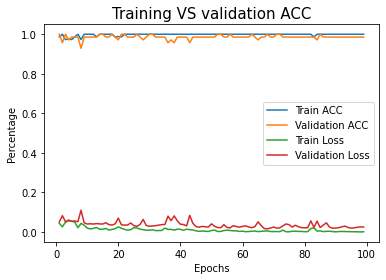

In [46]:
acc = d3_vgg19_history.history['accuracy']
loss = d3_vgg19_history.history['loss']

val_acc = d3_vgg19_history.history['val_accuracy']
val_loss = d3_vgg19_history.history['val_loss']

epochs = len(acc)

plt.plot(range(1, epochs), acc[1:], label='Train ACC')
plt.plot(range(1, epochs), val_acc[1:], label='Validation ACC')
plt.plot(range(1, epochs), loss[1:], label='Train Loss')
plt.plot(range(1, epochs), val_loss[1:], label='Validation Loss')
plt.title('Training VS validation ACC', size=15)
plt.xlabel("Epochs")
plt.ylabel("Percentage")
plt.legend()
plt.savefig("vgg19_d3.png")
plt.show()

# **InceptionV3**

In [47]:
inceptionv3_basemodel = tf.keras.applications.InceptionV3(include_top=False, weights='imagenet', input_shape=(IMSIZE,IMSIZE,3))
#inceptionv3_basemodel.summary()

x = inceptionv3_basemodel.output

x = tf.keras.layers.Conv2D(16, (3,3), activation='relu')(x)
x = tf.keras.layers.MaxPooling2D(2,2)(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(32, activation="relu")(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(1, activation="sigmoid")(x)

for layer in inceptionv3_basemodel.layers:
  layer.trainable = False

inceptionv3_model = tf.keras.Model(inceptionv3_basemodel.input, x)
inceptionv3_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=LR), loss='binary_crossentropy', metrics=['accuracy'])

#inceptionv3_model.summary()


87916544/87910968 [==============================] - 1s 0us/step


In [48]:
d1_inceptionv3_history = inceptionv3_model.fit(d1_train_generator, 
                          epochs=EPOCHS, 
                          validation_data=d1_test_generator, 
                          steps_per_epoch=d1_stepsize_train, 
                          validation_steps=d1_stepsize_test,
                          callbacks=[ccall, es]
                          )

Epoch 1/100
7/7 [==============================] - 8s 1s/step - loss: 1.4785 - accuracy: 0.5135 - val_loss: 0.8192 - val_accuracy: 0.6000
Epoch 2/100
7/7 [==============================] - 8s 1s/step - loss: 0.7695 - accuracy: 0.6892 - val_loss: 0.8787 - val_accuracy: 0.5000
Epoch 3/100
7/7 [==============================] - 7s 1s/step - loss: 0.8293 - accuracy: 0.6071 - val_loss: 0.6972 - val_accuracy: 0.4714
Epoch 4/100
7/7 [==============================] - 7s 1s/step - loss: 0.6877 - accuracy: 0.5946 - val_loss: 0.7787 - val_accuracy: 0.6143
Epoch 5/100
7/7 [==============================] - 6s 895ms/step - loss: 0.4979 - accuracy: 0.7297 - val_loss: 0.7459 - val_accuracy: 0.5143
Epoch 6/100
7/7 [==============================] - 7s 1s/step - loss: 0.5388 - accuracy: 0.7162 - val_loss: 0.7282 - val_accuracy: 0.6429
Epoch 7/100
7/7 [==============================] - 7s 949ms/step - loss: 0.5778 - accuracy: 0.7162 - val_loss: 0.8338 - val_accuracy: 0.4571
Epoch 8/100
7/7 [===========

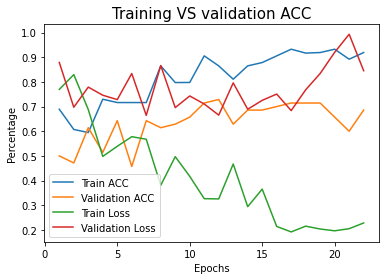

In [49]:
acc = d1_inceptionv3_history.history['accuracy']
loss = d1_inceptionv3_history.history['loss']

val_acc = d1_inceptionv3_history.history['val_accuracy']
val_loss = d1_inceptionv3_history.history['val_loss']

epochs = len(acc)

plt.plot(range(1, epochs), acc[1:], label='Train ACC')
plt.plot(range(1, epochs), val_acc[1:], label='Validation ACC')
plt.plot(range(1, epochs), loss[1:], label='Train Loss')
plt.plot(range(1, epochs), val_loss[1:], label='Validation Loss')
plt.title('Training VS validation ACC', size=15)
plt.xlabel("Epochs")
plt.ylabel("Percentage")
plt.legend()
plt.savefig("inceptionv3_d1.png")
plt.show()

In [50]:
d1_inceptionv3_pred = inceptionv3_model.predict(d1_test_generator, steps=d1_stepsize_test)
inceptionv3_model.evaluate(d1_test_generator, steps=d1_stepsize_test)

7/7 [==============================] - 3s 386ms/step - loss: 0.6652 - accuracy: 0.7286


[0.6652302742004395, 0.7285714149475098]

In [51]:
d2_inceptionv3_history = inceptionv3_model.fit(d2_train_generator, 
                          epochs=EPOCHS, 
                          validation_data=d2_test_generator, 
                          steps_per_epoch=d2_stepsize_train, 
                          validation_steps=d2_stepsize_test,
                          callbacks=[ccall, es]
                          )

Epoch 1/100
7/7 [==============================] - 5s 697ms/step - loss: 0.1433 - accuracy: 0.9459 - val_loss: 0.2051 - val_accuracy: 0.9143
Epoch 2/100
7/7 [==============================] - 5s 703ms/step - loss: 0.1645 - accuracy: 0.9189 - val_loss: 0.1570 - val_accuracy: 0.9429
Epoch 3/100
7/7 [==============================] - 5s 717ms/step - loss: 0.1208 - accuracy: 0.9459 - val_loss: 0.1355 - val_accuracy: 0.9429
Epoch 4/100
7/7 [==============================] - 5s 778ms/step - loss: 0.0747 - accuracy: 0.9762 - val_loss: 0.0309 - val_accuracy: 1.0000
Epoch 5/100
7/7 [==============================] - 6s 805ms/step - loss: 0.1037 - accuracy: 0.9595 - val_loss: 0.1141 - val_accuracy: 0.9571
Epoch 6/100
7/7 [==============================] - 5s 699ms/step - loss: 0.0523 - accuracy: 0.9730 - val_loss: 0.0723 - val_accuracy: 0.9571
Epoch 7/100
7/7 [==============================] - 5s 690ms/step - loss: 0.0054 - accuracy: 1.0000 - val_loss: 0.0194 - val_accuracy: 1.0000
Epoch 8/100
7

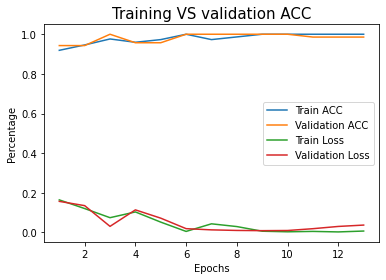

In [52]:
acc = d2_inceptionv3_history.history['accuracy']
loss = d2_inceptionv3_history.history['loss']

val_acc = d2_inceptionv3_history.history['val_accuracy']
val_loss = d2_inceptionv3_history.history['val_loss']

epochs = len(acc)

plt.plot(range(1, epochs), acc[1:], label='Train ACC')
plt.plot(range(1, epochs), val_acc[1:], label='Validation ACC')
plt.plot(range(1, epochs), loss[1:], label='Train Loss')
plt.plot(range(1, epochs), val_loss[1:], label='Validation Loss')
plt.title('Training VS validation ACC', size=15)
plt.xlabel("Epochs")
plt.ylabel("Percentage")
plt.legend()
plt.savefig("inceptionv3_d2.png")
plt.show()

In [53]:
d2_inceptionv3_pred = inceptionv3_model.predict(d2_test_generator, steps=d2_stepsize_test)
inceptionv3_model.evaluate(d2_test_generator, steps=d2_stepsize_test)

7/7 [==============================] - 2s 231ms/step - loss: 0.0309 - accuracy: 1.0000


[0.03092707134783268, 1.0]

In [54]:
d3_inceptionv3_history = inceptionv3_model.fit(d3_train_generator, 
                          epochs=EPOCHS, 
                          validation_data=d3_test_generator, 
                          steps_per_epoch=d3_stepsize_train, 
                          validation_steps=d3_stepsize_test,
                          callbacks=[ccall, es]
                          )

Epoch 1/100
7/7 [==============================] - 4s 583ms/step - loss: 0.3107 - accuracy: 0.8919 - val_loss: 0.3433 - val_accuracy: 0.8429
Epoch 2/100
7/7 [==============================] - 5s 654ms/step - loss: 0.2726 - accuracy: 0.9048 - val_loss: 0.4767 - val_accuracy: 0.7286
Epoch 3/100
7/7 [==============================] - 4s 617ms/step - loss: 0.1685 - accuracy: 0.8784 - val_loss: 0.1759 - val_accuracy: 0.9429
Epoch 4/100
7/7 [==============================] - 4s 521ms/step - loss: 0.0669 - accuracy: 0.9865 - val_loss: 0.1724 - val_accuracy: 0.9429
Epoch 5/100
7/7 [==============================] - 4s 584ms/step - loss: 0.1267 - accuracy: 0.9595 - val_loss: 0.1247 - val_accuracy: 0.9714
Epoch 6/100
7/7 [==============================] - 4s 562ms/step - loss: 0.0909 - accuracy: 0.9730 - val_loss: 0.1285 - val_accuracy: 0.9429
Epoch 7/100
7/7 [==============================] - 4s 638ms/step - loss: 0.0620 - accuracy: 0.9865 - val_loss: 0.1147 - val_accuracy: 0.9429
Epoch 8/100
7

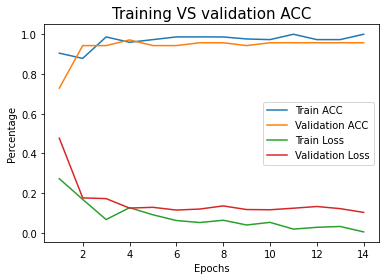

In [55]:
acc = d3_inceptionv3_history.history['accuracy']
loss = d3_inceptionv3_history.history['loss']

val_acc = d3_inceptionv3_history.history['val_accuracy']
val_loss = d3_inceptionv3_history.history['val_loss']

epochs = len(acc)

plt.plot(range(1, epochs), acc[1:], label='Train ACC')
plt.plot(range(1, epochs), val_acc[1:], label='Validation ACC')
plt.plot(range(1, epochs), loss[1:], label='Train Loss')
plt.plot(range(1, epochs), val_loss[1:], label='Validation Loss')
plt.title('Training VS validation ACC', size=15)
plt.xlabel("Epochs")
plt.ylabel("Percentage")
plt.legend()
plt.savefig("inceptionv3_d3.png")
plt.show()

In [56]:
d3_inceptionv3_pred = inceptionv3_model.predict(d3_test_generator, steps=d3_stepsize_test)
inceptionv3_model.evaluate(d3_test_generator, steps=d3_stepsize_test)

7/7 [==============================] - 1s 183ms/step - loss: 0.1247 - accuracy: 0.9714


[0.12469391524791718, 0.9714285731315613]

# **Xception**

In [57]:
xception_basemodel = tf.keras.applications.Xception(include_top=False, weights='imagenet', input_shape=(IMSIZE,IMSIZE,3))
#xception_basemodel.summary()

x = xception_basemodel.output

"""x = tf.keras.layers.Conv2D(32, (3,3), activation='relu')(x)
x = tf.keras.layers.MaxPool2D(2,2) (x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(16, activation='relu')"""

#x = tf.keras.layers.GlobalAveragePooling2D()(x)
"""x = tf.keras.layers.Conv2D(32, (3,3), activation='relu')(x)
x = tf.keras.layers.MaxPooling2D(2,2)(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dropout(0.3) (x)
x = tf.keras.layers.Dense(2, activation='softmax') (x)"""

x = tf.keras.layers.Conv2D(16, (3,3), activation='relu')(x)
x = tf.keras.layers.MaxPooling2D(2,2)(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(32, activation="relu")(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(1, activation="sigmoid")(x)

for layer in xception_basemodel.layers:
  layer.trainable = False

xception_model = tf.keras.Model(xception_basemodel.input, x)
xception_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=LR), loss='binary_crossentropy', metrics=['accuracy'])

#xception_model.summary()


83689472/83683744 [==============================] - 1s 0us/step


In [58]:
d1_xception_history = xception_model.fit(d1_train_generator, 
                          epochs=EPOCHS, 
                          validation_data=d1_test_generator, 
                          steps_per_epoch=d1_stepsize_train, 
                          validation_steps=d1_stepsize_test,
                          callbacks=[ccall, es]
                          )

Epoch 1/100
7/7 [==============================] - 8s 1s/step - loss: 1.9763 - accuracy: 0.5946 - val_loss: 1.8155 - val_accuracy: 0.6000
Epoch 2/100
7/7 [==============================] - 7s 931ms/step - loss: 1.3179 - accuracy: 0.5270 - val_loss: 1.0379 - val_accuracy: 0.4857
Epoch 3/100
7/7 [==============================] - 7s 946ms/step - loss: 1.4907 - accuracy: 0.3784 - val_loss: 0.7284 - val_accuracy: 0.6857
Epoch 4/100
7/7 [==============================] - 7s 941ms/step - loss: 0.5437 - accuracy: 0.7297 - val_loss: 0.7246 - val_accuracy: 0.6286
Epoch 5/100
7/7 [==============================] - 8s 1s/step - loss: 0.5937 - accuracy: 0.7024 - val_loss: 0.6075 - val_accuracy: 0.7286
Epoch 6/100
7/7 [==============================] - 7s 1s/step - loss: 0.5315 - accuracy: 0.7568 - val_loss: 0.6086 - val_accuracy: 0.6429
Epoch 7/100
7/7 [==============================] - 7s 950ms/step - loss: 0.4010 - accuracy: 0.8243 - val_loss: 0.6518 - val_accuracy: 0.6857
Epoch 8/100
7/7 [=====

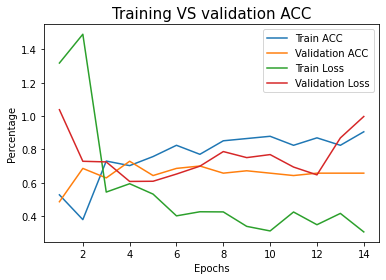

In [59]:
acc = d1_xception_history.history['accuracy']
loss = d1_xception_history.history['loss']

val_acc = d1_xception_history.history['val_accuracy']
val_loss = d1_xception_history.history['val_loss']

epochs = len(acc)

plt.plot(range(1, epochs), acc[1:], label='Train ACC')
plt.plot(range(1, epochs), val_acc[1:], label='Validation ACC')
plt.plot(range(1, epochs), loss[1:], label='Train Loss')
plt.plot(range(1, epochs), val_loss[1:], label='Validation Loss')
plt.title('Training VS validation ACC', size=15)
plt.xlabel("Epochs")
plt.ylabel("Percentage")
plt.legend()
plt.savefig("xception_d1.png")
plt.show()

In [60]:
d1_xception_pred = xception_model.predict(d1_test_generator, steps=d1_stepsize_test)
xception_model.evaluate(d1_test_generator, steps=d1_stepsize_test)

7/7 [==============================] - 3s 386ms/step - loss: 0.6075 - accuracy: 0.7286


[0.6074737906455994, 0.7285714149475098]

In [61]:
d2_xception_history = xception_model.fit(d2_train_generator, 
                          epochs=EPOCHS, 
                          validation_data=d2_test_generator, 
                          steps_per_epoch=d2_stepsize_train, 
                          validation_steps=d2_stepsize_test,
                          callbacks=[ccall, es]
                          )

Epoch 1/100
7/7 [==============================] - 5s 732ms/step - loss: 0.3774 - accuracy: 0.8243 - val_loss: 0.1259 - val_accuracy: 0.9714
Epoch 2/100
7/7 [==============================] - 5s 713ms/step - loss: 0.2020 - accuracy: 0.9459 - val_loss: 0.0918 - val_accuracy: 0.9714
Epoch 3/100
7/7 [==============================] - 5s 693ms/step - loss: 0.1531 - accuracy: 0.9324 - val_loss: 0.0299 - val_accuracy: 0.9857
Epoch 4/100
7/7 [==============================] - 5s 667ms/step - loss: 0.0991 - accuracy: 0.9730 - val_loss: 0.0347 - val_accuracy: 0.9857
Epoch 5/100
7/7 [==============================] - 5s 727ms/step - loss: 0.0569 - accuracy: 0.9730 - val_loss: 0.0136 - val_accuracy: 1.0000
Epoch 6/100
7/7 [==============================] - 5s 722ms/step - loss: 0.0487 - accuracy: 0.9865 - val_loss: 0.0167 - val_accuracy: 0.9857
Epoch 7/100
7/7 [==============================] - 5s 730ms/step - loss: 0.0541 - accuracy: 0.9762 - val_loss: 0.0318 - val_accuracy: 0.9857
Epoch 8/100
7

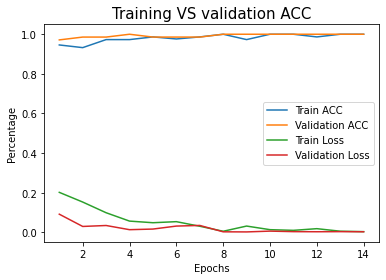

In [62]:
acc = d2_xception_history.history['accuracy']
loss = d2_xception_history.history['loss']

val_acc = d2_xception_history.history['val_accuracy']
val_loss = d2_xception_history.history['val_loss']

epochs = len(acc)

plt.plot(range(1, epochs), acc[1:], label='Train ACC')
plt.plot(range(1, epochs), val_acc[1:], label='Validation ACC')
plt.plot(range(1, epochs), loss[1:], label='Train Loss')
plt.plot(range(1, epochs), val_loss[1:], label='Validation Loss')
plt.title('Training VS validation ACC', size=15)
plt.xlabel("Epochs")
plt.ylabel("Percentage")
plt.legend()
plt.savefig("xception_d1.png")
plt.show()

In [63]:
d2_xception_pred = xception_model.predict(d2_test_generator, steps=d2_stepsize_test)
xception_model.evaluate(d2_test_generator, steps=d2_stepsize_test)

7/7 [==============================] - 1s 203ms/step - loss: 0.0136 - accuracy: 1.0000


[0.01357296947389841, 1.0]

In [64]:
d3_xception_history = xception_model.fit(d3_train_generator, 
                          epochs=EPOCHS, 
                          validation_data=d3_test_generator, 
                          steps_per_epoch=d3_stepsize_train, 
                          validation_steps=d3_stepsize_test,
                          callbacks=[ccall, es]
                          )

Epoch 1/100
7/7 [==============================] - 4s 579ms/step - loss: 0.4230 - accuracy: 0.8919 - val_loss: 0.4077 - val_accuracy: 0.9000
Epoch 2/100
7/7 [==============================] - 4s 625ms/step - loss: 0.1092 - accuracy: 0.9865 - val_loss: 0.2339 - val_accuracy: 0.9429
Epoch 3/100
7/7 [==============================] - 3s 491ms/step - loss: 0.1456 - accuracy: 0.9730 - val_loss: 0.2175 - val_accuracy: 0.9286
Epoch 4/100
7/7 [==============================] - 4s 572ms/step - loss: 0.1058 - accuracy: 0.9643 - val_loss: 0.2047 - val_accuracy: 0.9429
Epoch 5/100
7/7 [==============================] - 4s 642ms/step - loss: 0.2049 - accuracy: 0.9459 - val_loss: 0.1675 - val_accuracy: 0.9429
Epoch 6/100
7/7 [==============================] - 4s 578ms/step - loss: 0.0765 - accuracy: 1.0000 - val_loss: 0.1861 - val_accuracy: 0.9429
Epoch 7/100
7/7 [==============================] - 4s 591ms/step - loss: 0.1071 - accuracy: 0.9595 - val_loss: 0.2002 - val_accuracy: 0.9286
Epoch 8/100
7

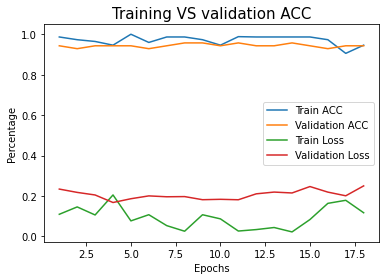

In [65]:
acc = d3_xception_history.history['accuracy']
loss = d3_xception_history.history['loss']

val_acc = d3_xception_history.history['val_accuracy']
val_loss = d3_xception_history.history['val_loss']

epochs = len(acc)

plt.plot(range(1, epochs), acc[1:], label='Train ACC')
plt.plot(range(1, epochs), val_acc[1:], label='Validation ACC')
plt.plot(range(1, epochs), loss[1:], label='Train Loss')
plt.plot(range(1, epochs), val_loss[1:], label='Validation Loss')
plt.title('Training VS validation ACC', size=15)
plt.xlabel("Epochs")
plt.ylabel("Percentage")
plt.legend()
plt.savefig("xception_d3.png")
plt.show()

In [66]:
d3_xception_pred = xception_model.predict(d3_test_generator, steps=d3_stepsize_test)
xception_model.evaluate(d3_test_generator, steps=d3_stepsize_test)

7/7 [==============================] - 1s 184ms/step - loss: 0.1968 - accuracy: 0.9571


[0.19676436483860016, 0.9571428298950195]

# **ResNetV2**

In [67]:
resnetv2_basemodel = tf.keras.applications.ResNet152V2(include_top=False, weights='imagenet', input_shape=(IMSIZE,IMSIZE,3))
#resnetv2_basemodel.summary()

x = resnetv2_basemodel.output

"""x = tf.keras.layers.Conv2D(32, (3,3), activation='relu')(x)
x = tf.keras.layers.MaxPool2D(2,2) (x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(16, activation='relu')"""

#x = tf.keras.layers.GlobalAveragePooling2D()(x)
"""x = tf.keras.layers.Conv2D(32, (3,3), activation='relu')(x)
x = tf.keras.layers.MaxPooling2D(2,2)(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dropout(0.3) (x)
x = tf.keras.layers.Dense(2, activation='softmax') (x)"""

x = tf.keras.layers.Conv2D(16, (3,3), activation='relu')(x)
x = tf.keras.layers.MaxPooling2D(2,2)(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(32, activation="relu")(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(1, activation="sigmoid")(x)

for layer in resnetv2_basemodel.layers:
  layer.trainable = False

resnetv2_model = tf.keras.Model(resnetv2_basemodel.input, x)
resnetv2_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=LR), loss='binary_crossentropy', metrics=['accuracy'])

#resnetv2_model.summary()

234553344/234545216 [==============================] - 4s 0us/step


In [68]:
d1_resnetv2_history = resnetv2_model.fit(d1_train_generator, 
                          epochs=EPOCHS, 
                          validation_data=d1_test_generator, 
                          steps_per_epoch=d1_stepsize_train, 
                          validation_steps=d1_stepsize_test,
                          callbacks=[ccall, es]
                          )

Epoch 1/100
7/7 [==============================] - 10s 1s/step - loss: 1.5147 - accuracy: 0.4324 - val_loss: 1.0228 - val_accuracy: 0.4857
Epoch 2/100
7/7 [==============================] - 8s 1s/step - loss: 0.9541 - accuracy: 0.4865 - val_loss: 0.8775 - val_accuracy: 0.5000
Epoch 3/100
7/7 [==============================] - 7s 1s/step - loss: 0.7106 - accuracy: 0.6081 - val_loss: 0.6618 - val_accuracy: 0.5857
Epoch 4/100
7/7 [==============================] - 7s 970ms/step - loss: 0.7193 - accuracy: 0.6622 - val_loss: 0.7860 - val_accuracy: 0.5857
Epoch 5/100
7/7 [==============================] - 7s 1s/step - loss: 0.6139 - accuracy: 0.6622 - val_loss: 0.7148 - val_accuracy: 0.6429
Epoch 6/100
7/7 [==============================] - 7s 965ms/step - loss: 0.5322 - accuracy: 0.6892 - val_loss: 0.6256 - val_accuracy: 0.6286
Epoch 7/100
7/7 [==============================] - 7s 1s/step - loss: 0.3393 - accuracy: 0.8452 - val_loss: 0.6589 - val_accuracy: 0.6286
Epoch 8/100
7/7 [==========

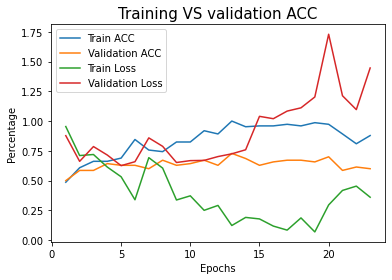

In [69]:
acc = d1_resnetv2_history.history['accuracy']
loss = d1_resnetv2_history.history['loss']

val_acc = d1_resnetv2_history.history['val_accuracy']
val_loss = d1_resnetv2_history.history['val_loss']

epochs = len(acc)

plt.plot(range(1, epochs), acc[1:], label='Train ACC')
plt.plot(range(1, epochs), val_acc[1:], label='Validation ACC')
plt.plot(range(1, epochs), loss[1:], label='Train Loss')
plt.plot(range(1, epochs), val_loss[1:], label='Validation Loss')
plt.title('Training VS validation ACC', size=15)
plt.xlabel("Epochs")
plt.ylabel("Percentage")
plt.legend()
plt.savefig("resnetv2_d1.png")
plt.show()

In [70]:
d1_resnetv2_pred = resnetv2_model.predict(d1_test_generator, steps=d1_stepsize_test)
resnetv2_model.evaluate(d1_test_generator, steps=d1_stepsize_test)

7/7 [==============================] - 3s 376ms/step - loss: 0.7250 - accuracy: 0.7286


[0.7250137329101562, 0.7285714149475098]

In [71]:
d2_resnetv2_history = resnetv2_model.fit(d2_train_generator, 
                          epochs=EPOCHS, 
                          validation_data=d2_test_generator, 
                          steps_per_epoch=d2_stepsize_train, 
                          validation_steps=d2_stepsize_test,
                          callbacks=[ccall, es]
                          )

Epoch 1/100
7/7 [==============================] - 5s 784ms/step - loss: 0.2306 - accuracy: 0.8929 - val_loss: 0.4783 - val_accuracy: 0.7857
Epoch 2/100
7/7 [==============================] - 6s 810ms/step - loss: 0.1208 - accuracy: 0.9865 - val_loss: 0.3386 - val_accuracy: 0.8571
Epoch 3/100
7/7 [==============================] - 5s 753ms/step - loss: 0.0811 - accuracy: 0.9730 - val_loss: 0.2086 - val_accuracy: 0.9000
Epoch 4/100
7/7 [==============================] - 5s 760ms/step - loss: 0.0659 - accuracy: 1.0000 - val_loss: 0.1390 - val_accuracy: 0.9429
Epoch 5/100
7/7 [==============================] - 5s 744ms/step - loss: 0.0211 - accuracy: 1.0000 - val_loss: 0.1180 - val_accuracy: 0.9571
Epoch 6/100
7/7 [==============================] - 5s 727ms/step - loss: 0.0083 - accuracy: 1.0000 - val_loss: 0.0940 - val_accuracy: 0.9571
Epoch 7/100
7/7 [==============================] - 5s 769ms/step - loss: 0.0264 - accuracy: 1.0000 - val_loss: 0.0572 - val_accuracy: 0.9857
Epoch 8/100
7

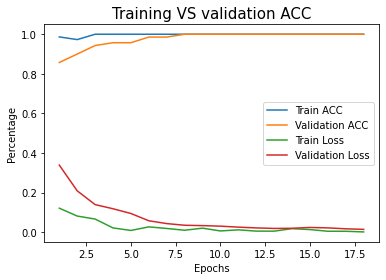

In [72]:
acc = d2_resnetv2_history.history['accuracy']
loss = d2_resnetv2_history.history['loss']

val_acc = d2_resnetv2_history.history['val_accuracy']
val_loss = d2_resnetv2_history.history['val_loss']

epochs = len(acc)

plt.plot(range(1, epochs), acc[1:], label='Train ACC')
plt.plot(range(1, epochs), val_acc[1:], label='Validation ACC')
plt.plot(range(1, epochs), loss[1:], label='Train Loss')
plt.plot(range(1, epochs), val_loss[1:], label='Validation Loss')
plt.title('Training VS validation ACC', size=15)
plt.xlabel("Epochs")
plt.ylabel("Percentage")
plt.legend()
plt.savefig("resnetv2_d2.png")
plt.show()

In [73]:
d2_resnetv2_pred = resnetv2_model.predict(d2_test_generator, steps=d2_stepsize_test)
resnetv2_model.evaluate(d2_test_generator, steps=d2_stepsize_test)

7/7 [==============================] - 1s 203ms/step - loss: 0.0346 - accuracy: 1.0000


[0.034572456032037735, 1.0]

In [74]:
d3_resnetv2_history = resnetv2_model.fit(d3_train_generator, 
                          epochs=EPOCHS, 
                          validation_data=d3_test_generator, 
                          steps_per_epoch=d3_stepsize_train, 
                          validation_steps=d3_stepsize_test,
                          callbacks=[ccall, es]
                          )

Epoch 1/100
7/7 [==============================] - 4s 623ms/step - loss: 0.1526 - accuracy: 0.9459 - val_loss: 0.1314 - val_accuracy: 0.9714
Epoch 2/100
7/7 [==============================] - 4s 586ms/step - loss: 0.1994 - accuracy: 0.9405 - val_loss: 0.1179 - val_accuracy: 0.9571
Epoch 3/100
7/7 [==============================] - 5s 667ms/step - loss: 0.0951 - accuracy: 0.9595 - val_loss: 0.0958 - val_accuracy: 0.9857
Epoch 4/100
7/7 [==============================] - 4s 568ms/step - loss: 0.0739 - accuracy: 0.9730 - val_loss: 0.1500 - val_accuracy: 0.9286
Epoch 5/100
7/7 [==============================] - 4s 640ms/step - loss: 0.0351 - accuracy: 1.0000 - val_loss: 0.0520 - val_accuracy: 1.0000
Epoch 6/100
7/7 [==============================] - 4s 545ms/step - loss: 0.0143 - accuracy: 1.0000 - val_loss: 0.0976 - val_accuracy: 0.9571
Epoch 7/100
7/7 [==============================] - 4s 543ms/step - loss: 0.0328 - accuracy: 0.9865 - val_loss: 0.0662 - val_accuracy: 0.9571
Epoch 8/100
7

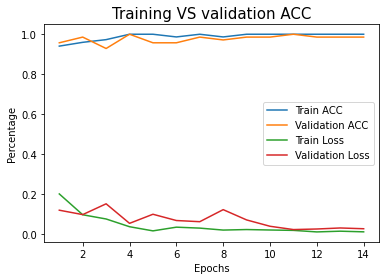

In [75]:
acc = d3_resnetv2_history.history['accuracy']
loss = d3_resnetv2_history.history['loss']

val_acc = d3_resnetv2_history.history['val_accuracy']
val_loss = d3_resnetv2_history.history['val_loss']

epochs = len(acc)

plt.plot(range(1, epochs), acc[1:], label='Train ACC')
plt.plot(range(1, epochs), val_acc[1:], label='Validation ACC')
plt.plot(range(1, epochs), loss[1:], label='Train Loss')
plt.plot(range(1, epochs), val_loss[1:], label='Validation Loss')
plt.title('Training VS validation ACC', size=15)
plt.xlabel("Epochs")
plt.ylabel("Percentage")
plt.legend()
plt.savefig("resnetv2_d3.png")
plt.show()

In [76]:
d3_resnetv2_pred = resnetv2_model.predict(d3_test_generator, steps=d3_stepsize_test)
resnetv2_model.evaluate(d3_test_generator, steps=d3_stepsize_test)

7/7 [==============================] - 1s 178ms/step - loss: 0.0520 - accuracy: 1.0000


[0.05200542137026787, 1.0]

# **MobileNetV2**

In [77]:
mobilenetv2_basemodel = tf.keras.applications.MobileNetV2(include_top=False, weights="imagenet", input_shape=(IMSIZE,IMSIZE,3))
#mobilenetv2_basemodel.summary()

x = mobilenetv2_basemodel.output

"""x = tf.keras.layers.Conv2D(32, (3,3), activation='relu')(x)
x = tf.keras.layers.MaxPool2D(2,2) (x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(16, activation='relu')"""

#x = tf.keras.layers.GlobalAveragePooling2D()(x)
"""x = tf.keras.layers.Conv2D(32, (3,3), activation='relu')(x)
x = tf.keras.layers.MaxPooling2D(2,2)(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dropout(0.3) (x)
x = tf.keras.layers.Dense(2, activation='softmax') (x)"""

x = tf.keras.layers.Conv2D(16, (3,3), activation='relu')(x)
x = tf.keras.layers.MaxPooling2D(2,2)(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(32, activation="relu")(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(1, activation="sigmoid")(x)

for layer in mobilenetv2_basemodel.layers:
  layer.trainable = False

mobilenetv2_model = tf.keras.Model(mobilenetv2_basemodel.input, x)
mobilenetv2_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

#mobilenetv2_model.summary()

9412608/9406464 [==============================] - 0s 0us/step


In [78]:
d1_mobilenetv2_history = mobilenetv2_model.fit(d1_train_generator, 
                          epochs=EPOCHS, 
                          validation_data=d1_test_generator, 
                          steps_per_epoch=d1_stepsize_train, 
                          validation_steps=d1_stepsize_test,
                          callbacks=[ccall, es]
                          )

Epoch 1/100
7/7 [==============================] - 8s 1s/step - loss: 1.2722 - accuracy: 0.5135 - val_loss: 0.8230 - val_accuracy: 0.5000
Epoch 2/100
7/7 [==============================] - 7s 968ms/step - loss: 0.9265 - accuracy: 0.5000 - val_loss: 0.7276 - val_accuracy: 0.6571
Epoch 3/100
7/7 [==============================] - 7s 940ms/step - loss: 0.6678 - accuracy: 0.6622 - val_loss: 0.7194 - val_accuracy: 0.5857
Epoch 4/100
7/7 [==============================] - 8s 1s/step - loss: 0.6823 - accuracy: 0.7432 - val_loss: 0.7080 - val_accuracy: 0.5857
Epoch 5/100
7/7 [==============================] - 6s 907ms/step - loss: 0.3947 - accuracy: 0.7973 - val_loss: 0.7975 - val_accuracy: 0.5714
Epoch 6/100
7/7 [==============================] - 7s 1s/step - loss: 0.2585 - accuracy: 0.8919 - val_loss: 0.9751 - val_accuracy: 0.6000
Epoch 7/100
7/7 [==============================] - 7s 993ms/step - loss: 0.4445 - accuracy: 0.7838 - val_loss: 0.7901 - val_accuracy: 0.7000
Epoch 8/100
7/7 [=====

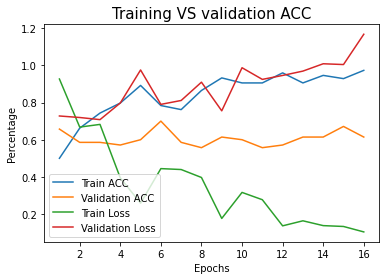

In [79]:
acc = d1_mobilenetv2_history.history['accuracy']
loss = d1_mobilenetv2_history.history['loss']

val_acc = d1_mobilenetv2_history.history['val_accuracy']
val_loss = d1_mobilenetv2_history.history['val_loss']

epochs = len(acc)

plt.plot(range(1, epochs), acc[1:], label='Train ACC')
plt.plot(range(1, epochs), val_acc[1:], label='Validation ACC')
plt.plot(range(1, epochs), loss[1:], label='Train Loss')
plt.plot(range(1, epochs), val_loss[1:], label='Validation Loss')
plt.title('Training VS validation ACC', size=15)
plt.xlabel("Epochs")
plt.ylabel("Percentage")
plt.legend()
plt.savefig("mobilenetv2_d1.png")
plt.show()

In [80]:
d1_mobilenetv2_pred = mobilenetv2_model.predict(d1_test_generator, steps=d1_stepsize_test)
mobilenetv2_model.evaluate(d1_test_generator, steps=d1_stepsize_test)

7/7 [==============================] - 3s 379ms/step - loss: 0.7901 - accuracy: 0.7000


[0.7901077270507812, 0.699999988079071]

In [81]:
d2_mobilenetv2_history = mobilenetv2_model.fit(d2_train_generator, 
                          epochs=EPOCHS, 
                          validation_data=d2_test_generator, 
                          steps_per_epoch=d2_stepsize_train, 
                          validation_steps=d2_stepsize_test,
                          callbacks=[ccall, es]
                          )

Epoch 1/100
7/7 [==============================] - 5s 715ms/step - loss: 0.2643 - accuracy: 0.8649 - val_loss: 0.1925 - val_accuracy: 0.9286
Epoch 2/100
7/7 [==============================] - 5s 662ms/step - loss: 0.0822 - accuracy: 0.9730 - val_loss: 0.1227 - val_accuracy: 0.9571
Epoch 3/100
7/7 [==============================] - 5s 669ms/step - loss: 0.0594 - accuracy: 0.9730 - val_loss: 0.0994 - val_accuracy: 0.9714
Epoch 4/100
7/7 [==============================] - 5s 726ms/step - loss: 0.0280 - accuracy: 1.0000 - val_loss: 0.0986 - val_accuracy: 0.9714
Epoch 5/100
7/7 [==============================] - 4s 631ms/step - loss: 0.0073 - accuracy: 1.0000 - val_loss: 0.0989 - val_accuracy: 0.9714
Epoch 6/100
7/7 [==============================] - 5s 714ms/step - loss: 0.0159 - accuracy: 1.0000 - val_loss: 0.0957 - val_accuracy: 0.9714
Epoch 7/100
7/7 [==============================] - 5s 776ms/step - loss: 0.0303 - accuracy: 0.9881 - val_loss: 0.1496 - val_accuracy: 0.9714
Epoch 8/100
7

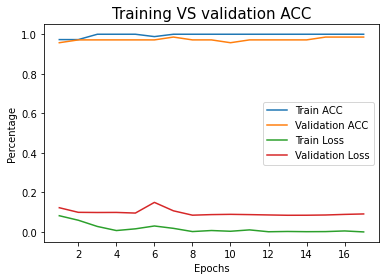

In [82]:
acc = d2_mobilenetv2_history.history['accuracy']
loss = d2_mobilenetv2_history.history['loss']

val_acc = d2_mobilenetv2_history.history['val_accuracy']
val_loss = d2_mobilenetv2_history.history['val_loss']

epochs = len(acc)

plt.plot(range(1, epochs), acc[1:], label='Train ACC')
plt.plot(range(1, epochs), val_acc[1:], label='Validation ACC')
plt.plot(range(1, epochs), loss[1:], label='Train Loss')
plt.plot(range(1, epochs), val_loss[1:], label='Validation Loss')
plt.title('Training VS validation ACC', size=15)
plt.xlabel("Epochs")
plt.ylabel("Percentage")
plt.legend()
plt.savefig("mobilenetv2_d2.png")
plt.show()

In [83]:
d2_mobilenetv2_pred = mobilenetv2_model.predict(d2_test_generator, steps=d2_stepsize_test)
mobilenetv2_model.evaluate(d2_test_generator, steps=d2_stepsize_test)

7/7 [==============================] - 2s 230ms/step - loss: 0.1070 - accuracy: 0.9857


[0.1070360466837883, 0.9857142567634583]

In [84]:
d3_mobilenetv2_history = mobilenetv2_model.fit(d3_train_generator, 
                          epochs=EPOCHS, 
                          validation_data=d3_test_generator, 
                          steps_per_epoch=d3_stepsize_train, 
                          validation_steps=d3_stepsize_test,
                          callbacks=[ccall, es]
                          )

Epoch 1/100
7/7 [==============================] - 4s 558ms/step - loss: 0.2263 - accuracy: 0.8919 - val_loss: 0.3822 - val_accuracy: 0.8714
Epoch 2/100
7/7 [==============================] - 4s 569ms/step - loss: 0.0796 - accuracy: 0.9595 - val_loss: 0.2731 - val_accuracy: 0.9143
Epoch 3/100
7/7 [==============================] - 4s 564ms/step - loss: 0.1233 - accuracy: 0.9459 - val_loss: 0.3973 - val_accuracy: 0.8857
Epoch 4/100
7/7 [==============================] - 4s 613ms/step - loss: 0.0633 - accuracy: 0.9762 - val_loss: 0.1973 - val_accuracy: 0.9571
Epoch 5/100
7/7 [==============================] - 4s 599ms/step - loss: 0.0657 - accuracy: 0.9865 - val_loss: 0.1929 - val_accuracy: 0.9571
Epoch 6/100
7/7 [==============================] - 4s 526ms/step - loss: 0.0426 - accuracy: 0.9865 - val_loss: 0.2551 - val_accuracy: 0.9143
Epoch 7/100
7/7 [==============================] - 4s 529ms/step - loss: 0.0163 - accuracy: 1.0000 - val_loss: 0.2010 - val_accuracy: 0.9571
Epoch 8/100
7

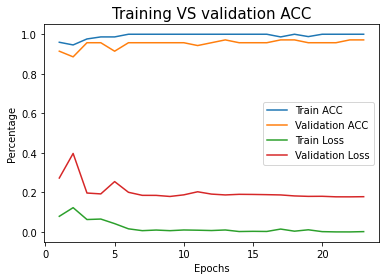

In [85]:
acc = d3_mobilenetv2_history.history['accuracy']
loss = d3_mobilenetv2_history.history['loss']

val_acc = d3_mobilenetv2_history.history['val_accuracy']
val_loss = d3_mobilenetv2_history.history['val_loss']

epochs = len(acc)

plt.plot(range(1, epochs), acc[1:], label='Train ACC')
plt.plot(range(1, epochs), val_acc[1:], label='Validation ACC')
plt.plot(range(1, epochs), loss[1:], label='Train Loss')
plt.plot(range(1, epochs), val_loss[1:], label='Validation Loss')
plt.title('Training VS validation ACC', size=15)
plt.xlabel("Epochs")
plt.ylabel("Percentage")
plt.legend()
plt.savefig("mobilenetv2_d3.png")
plt.show()

In [86]:
d3_mobilenetv2_pred = mobilenetv2_model.predict(d3_test_generator, steps=d3_stepsize_test)
mobilenetv2_model.evaluate(d3_test_generator, steps=d3_stepsize_test)

7/7 [==============================] - 1s 184ms/step - loss: 0.1876 - accuracy: 0.9714


[0.18762053549289703, 0.9714285731315613]

# **DenseNET201**

In [87]:
densenet_basemodel = tf.keras.applications.DenseNet201(include_top=False, input_shape=(IMSIZE,IMSIZE,3), weights='imagenet')
#densenet_basemodel.summary()

x = densenet_basemodel.output

"""x = tf.keras.layers.Conv2D(32, (3,3), activation='relu')(x)
x = tf.keras.layers.MaxPool2D(2,2) (x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(16, activation='relu')"""

#x = tf.keras.layers.GlobalAveragePooling2D()(x)
"""x = tf.keras.layers.Conv2D(32, (3,3), activation='relu')(x)
x = tf.keras.layers.MaxPooling2D(2,2)(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dropout(0.3) (x)
x = tf.keras.layers.Dense(2, activation='softmax') (x)"""

x = tf.keras.layers.Conv2D(16, (3,3), activation='relu')(x)
x = tf.keras.layers.MaxPooling2D(2,2)(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(32, activation="relu")(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(1, activation="sigmoid")(x)

for layer in densenet_basemodel.layers:
  layer.trainable = False

densenet_model = tf.keras.Model(densenet_basemodel.input, x)
densenet_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=LR), loss='binary_crossentropy', metrics=['accuracy'])

#densenet_model.summary()

74842112/74836368 [==============================] - 1s 0us/step


In [88]:
d1_densenet_history = densenet_model.fit(d1_train_generator, 
                          epochs=EPOCHS, 
                          validation_data=d1_test_generator, 
                          steps_per_epoch=d1_stepsize_train, 
                          validation_steps=d1_stepsize_test,
                          callbacks=[ccall, es]
                          )

Epoch 1/40
7/7 [==============================] - 11s 2s/step - loss: 1.2003 - accuracy: 0.5946 - val_loss: 0.7884 - val_accuracy: 0.4714
Epoch 2/40
7/7 [==============================] - 7s 984ms/step - loss: 0.8101 - accuracy: 0.5676 - val_loss: 0.8269 - val_accuracy: 0.4857
Epoch 3/40
7/7 [==============================] - 7s 996ms/step - loss: 0.8640 - accuracy: 0.6216 - val_loss: 0.8780 - val_accuracy: 0.5857
Epoch 4/40
7/7 [==============================] - 7s 972ms/step - loss: 0.5935 - accuracy: 0.7297 - val_loss: 0.7505 - val_accuracy: 0.5286
Epoch 5/40
7/7 [==============================] - 7s 986ms/step - loss: 0.5268 - accuracy: 0.7703 - val_loss: 0.7717 - val_accuracy: 0.5000
Epoch 6/40
7/7 [==============================] - 7s 1s/step - loss: 0.4104 - accuracy: 0.8378 - val_loss: 0.6919 - val_accuracy: 0.5429
Epoch 7/40
7/7 [==============================] - 7s 960ms/step - loss: 0.3908 - accuracy: 0.9189 - val_loss: 0.6719 - val_accuracy: 0.6429
Epoch 8/40
7/7 [=========

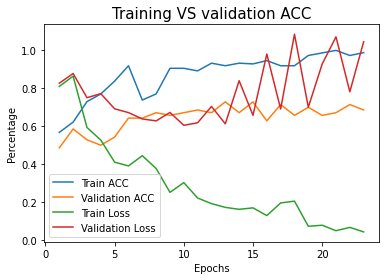

In [89]:
acc = d1_densenet_history.history['accuracy']
loss = d1_densenet_history.history['loss']

val_acc = d1_densenet_history.history['val_accuracy']
val_loss = d1_densenet_history.history['val_loss']

epochs = len(acc)

plt.plot(range(1, epochs), acc[1:], label='Train ACC')
plt.plot(range(1, epochs), val_acc[1:], label='Validation ACC')
plt.plot(range(1, epochs), loss[1:], label='Train Loss')
plt.plot(range(1, epochs), val_loss[1:], label='Validation Loss')
plt.title('Training VS validation ACC', size=15)
plt.xlabel("Epochs")
plt.ylabel("Percentage")
plt.legend()
plt.savefig("densenet_d1.png")
plt.show()

In [90]:
d1_densenet_pred = densenet_model.predict(d1_test_generator, steps=d1_stepsize_test)
densenet_model.evaluate(d1_test_generator, steps=d1_stepsize_test)

7/7 [==============================] - 2s 352ms/step - loss: 0.6126 - accuracy: 0.7286


[0.6126214861869812, 0.7285714149475098]

In [91]:
d2_densenet_history = densenet_model.fit(d2_train_generator, 
                          epochs=EPOCHS, 
                          validation_data=d2_test_generator, 
                          steps_per_epoch=d2_stepsize_train, 
                          validation_steps=d2_stepsize_test,
                          callbacks=[ccall, es]
                          )

Epoch 1/40
7/7 [==============================] - 5s 780ms/step - loss: 0.1556 - accuracy: 0.9459 - val_loss: 0.1115 - val_accuracy: 0.9857
Epoch 2/40
7/7 [==============================] - 5s 680ms/step - loss: 0.0521 - accuracy: 0.9865 - val_loss: 0.1005 - val_accuracy: 0.9714
Epoch 3/40
7/7 [==============================] - 5s 704ms/step - loss: 0.0291 - accuracy: 1.0000 - val_loss: 0.0598 - val_accuracy: 0.9714
Epoch 4/40
7/7 [==============================] - 5s 712ms/step - loss: 0.0298 - accuracy: 1.0000 - val_loss: 0.0319 - val_accuracy: 0.9857
Epoch 5/40
7/7 [==============================] - 5s 703ms/step - loss: 0.0227 - accuracy: 1.0000 - val_loss: 0.0215 - val_accuracy: 0.9857
Epoch 6/40
7/7 [==============================] - 6s 800ms/step - loss: 0.0155 - accuracy: 1.0000 - val_loss: 0.0170 - val_accuracy: 1.0000
Epoch 7/40
7/7 [==============================] - 5s 768ms/step - loss: 0.0200 - accuracy: 0.9865 - val_loss: 0.0652 - val_accuracy: 0.9714
Epoch 8/40
7/7 [====

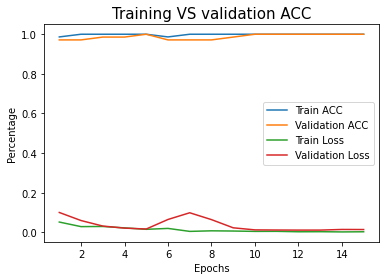

In [92]:
acc = d2_densenet_history.history['accuracy']
loss = d2_densenet_history.history['loss']

val_acc = d2_densenet_history.history['val_accuracy']
val_loss = d2_densenet_history.history['val_loss']

epochs = len(acc)

plt.plot(range(1, epochs), acc[1:], label='Train ACC')
plt.plot(range(1, epochs), val_acc[1:], label='Validation ACC')
plt.plot(range(1, epochs), loss[1:], label='Train Loss')
plt.plot(range(1, epochs), val_loss[1:], label='Validation Loss')
plt.title('Training VS validation ACC', size=15)
plt.xlabel("Epochs")
plt.ylabel("Percentage")
plt.legend()
plt.savefig("densenet_d2.png")
plt.show()

In [93]:
d2_densenet_pred = densenet_model.predict(d2_test_generator, steps=d2_stepsize_test)
densenet_model.evaluate(d2_test_generator, steps=d2_stepsize_test)

7/7 [==============================] - 2s 234ms/step - loss: 0.0170 - accuracy: 1.0000


[0.016997797414660454, 1.0]

In [94]:
d3_densenet_history = densenet_model.fit(d3_train_generator, 
                          epochs=EPOCHS, 
                          validation_data=d3_test_generator, 
                          steps_per_epoch=d3_stepsize_train, 
                          validation_steps=d3_stepsize_test,
                          callbacks=[ccall, esd3]
                          )

Epoch 1/40
7/7 [==============================] - 4s 580ms/step - loss: 0.0825 - accuracy: 0.9730 - val_loss: 0.4887 - val_accuracy: 0.8714
Epoch 2/40
7/7 [==============================] - 4s 555ms/step - loss: 0.1454 - accuracy: 0.9459 - val_loss: 0.1339 - val_accuracy: 0.9143
Epoch 3/40
7/7 [==============================] - 4s 567ms/step - loss: 0.1129 - accuracy: 0.9595 - val_loss: 0.1368 - val_accuracy: 0.9571
Epoch 4/40
7/7 [==============================] - 4s 548ms/step - loss: 0.0742 - accuracy: 0.9730 - val_loss: 0.2232 - val_accuracy: 0.9429
Epoch 5/40
7/7 [==============================] - 5s 667ms/step - loss: 0.0684 - accuracy: 0.9524 - val_loss: 0.0884 - val_accuracy: 0.9714
Epoch 6/40
7/7 [==============================] - 4s 629ms/step - loss: 0.0658 - accuracy: 0.9865 - val_loss: 0.0614 - val_accuracy: 0.9714
Epoch 7/40
7/7 [==============================] - 4s 566ms/step - loss: 0.0207 - accuracy: 1.0000 - val_loss: 0.1269 - val_accuracy: 0.9714
Epoch 8/40
7/7 [====

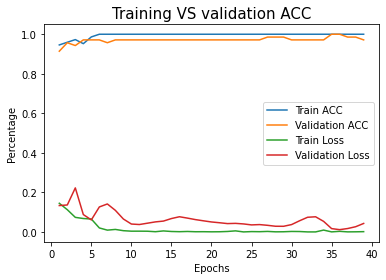

In [95]:
acc = d3_densenet_history.history['accuracy']
loss = d3_densenet_history.history['loss']

val_acc = d3_densenet_history.history['val_accuracy']
val_loss = d3_densenet_history.history['val_loss']

epochs = len(acc)

plt.plot(range(1, epochs), acc[1:], label='Train ACC')
plt.plot(range(1, epochs), val_acc[1:], label='Validation ACC')
plt.plot(range(1, epochs), loss[1:], label='Train Loss')
plt.plot(range(1, epochs), val_loss[1:], label='Validation Loss')
plt.title('Training VS validation ACC', size=15)
plt.xlabel("Epochs")
plt.ylabel("Percentage")
plt.legend()
plt.savefig("densenet_d3.png")
plt.show()

In [96]:
d3_densenet_pred = densenet_model.predict(d3_test_generator, steps=d3_stepsize_test)
densenet_model.evaluate(d3_test_generator, steps=d3_stepsize_test)

7/7 [==============================] - 1s 189ms/step - loss: 0.0434 - accuracy: 0.9714


[0.04344658926129341, 0.9714285731315613]

# Do it Yourself

In [97]:
custom_model = tf.keras.Sequential([
                                    tf.keras.layers.Conv2D(16, kernel_size=(3,3), activation='relu', input_shape=(256,256,3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.Conv2D(16, kernel_size=(3,3), activation='relu', input_shape=(256,256,3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(32, activation='relu'),
                                    tf.keras.layers.Dropout(0.2),
                                    tf.keras.layers.Dense(2, activation='softmax')

])

custom_model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.00001), loss=tf.keras.losses.binary_crossentropy, metrics=['accuracy'])

custom_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_105 (Conv2D)          (None, 254, 254, 16)      448       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 127, 127, 16)      0         
_________________________________________________________________
conv2d_106 (Conv2D)          (None, 125, 125, 16)      2320      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 62, 62, 16)        0         
_________________________________________________________________
conv2d_107 (Conv2D)          (None, 60, 60, 32)        4640      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_108 (Conv2D)          (None, 28, 28, 32)        9

In [0]:
custom_history = custom_model.fit(d2_train_generator, 
                 epochs=40, 
                 steps_per_epoch=d2_stepsize_train, 
                 validation_datagen=d2_test_generator,
                 validation_steps=d2_stepsize_test
                 )

In [0]:
custom_model.evaluate(d2_test_generator)